In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from pydicom import dcmread
%matplotlib inline
tf.__version__

import sys
print(sys.version)
print(sys.executable)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
C:\ProgramData\Anaconda3\python.exe


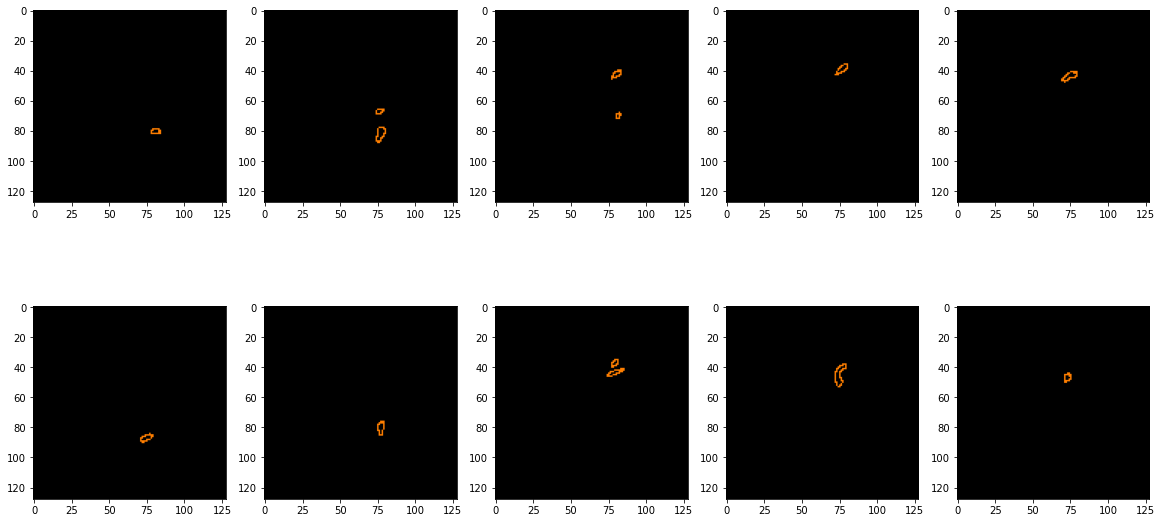

In [2]:
#draw lines with pillow and add images to list
import math
from PIL import Image, ImageDraw
import json
import glob
jsonFiles = glob.glob("001/*.json")
images = []
for i in jsonFiles:    
    file = open(i)
    data = json.load(file)
    im = Image.new("RGB", data['size'])
    draw = ImageDraw.Draw(im)
    shapes = data['shapes']
    for shape in shapes:
        segments = shape['segments']
        strokeColor = shape['strokeColor']
        for segment in segments:
            startEndCoord = [(segment['a'][0], segment['a'][1]),(segment['b'][0], segment['b'][1])]
            draw.line(startEndCoord, fill=strokeColor)
    images.append(im)

#show images with pyplot
quantity = len(images)
cols = 5
rows = math.ceil(quantity/cols)
fig,ax = plt.subplots(rows,cols,figsize=(20,10))
for i in range(len(images)):
    ax[i%rows][i//rows].imshow(images[i])

In [45]:
#find images file name by SeriesNumber to be drawn
from pydicom.fileset import FileSet
dicomdir = dcmread("002/dicomdir")
fs = FileSet(dicomdir)
print(fs)

seriesDict = {}
seriesNumber = fs.find_values("SeriesNumber")
for number in seriesNumber:
    series = fs.find(SeriesNumber=number)
    print("SeriesNumber=" + str(number) + ":")
    nameList = []
    for fileName in series:
        nameList.append(fileName.ReferencedFileID)
        print("  " + fileName.ReferencedFileID)
    seriesDict[number] = nameList
    print("---------------------------------")

DICOM File-set
  Root directory: C:\Users\Justin\Desktop\MRI\002
  File-set ID: 20220602091300
  File-set UID: 1.2.840.113820.4100.20220602091300.194973
  Descriptor file ID: (no value available)
  Descriptor file character set: (no value available)
  Changes staged for write(): DICOMDIR update, directory structure update

  Managed instances:
    PATIENT: PatientID='ID20220602091257', PatientName='Demo'
      STUDY: StudyDate=20220208, StudyTime=154719, StudyDescription='MRI, Brain with contrast'
        SERIES: Modality=PR, SeriesNumber=0
          PRESENTATION: 1 SOP Instance
        SERIES: Modality=PR, SeriesNumber=0
          PRESENTATION: 1 SOP Instance
        SERIES: Modality=PR, SeriesNumber=0
          PRESENTATION: 1 SOP Instance
        SERIES: Modality=PR, SeriesNumber=0
          PRESENTATION: 1 SOP Instance
        SERIES: Modality=PR, SeriesNumber=0
          PRESENTATION: 1 SOP Instance
        SERIES: Modality=PR, SeriesNumber=0
          PRESENTATION: 1 SOP Instance

<Figure size 1440x432 with 0 Axes>

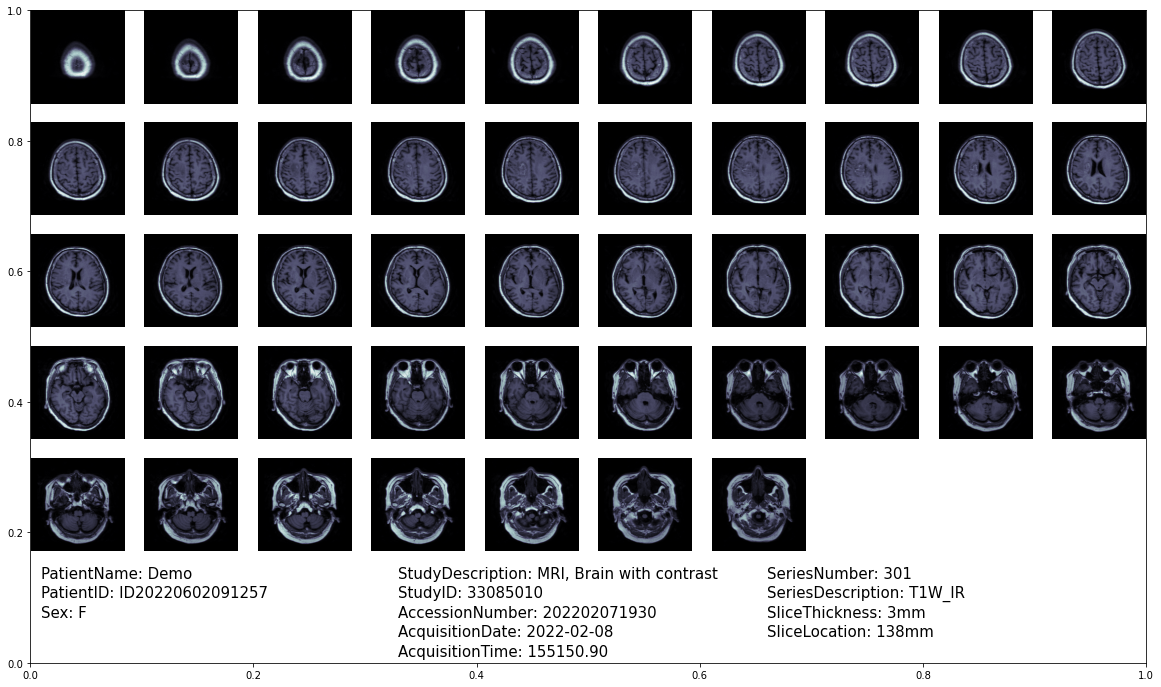

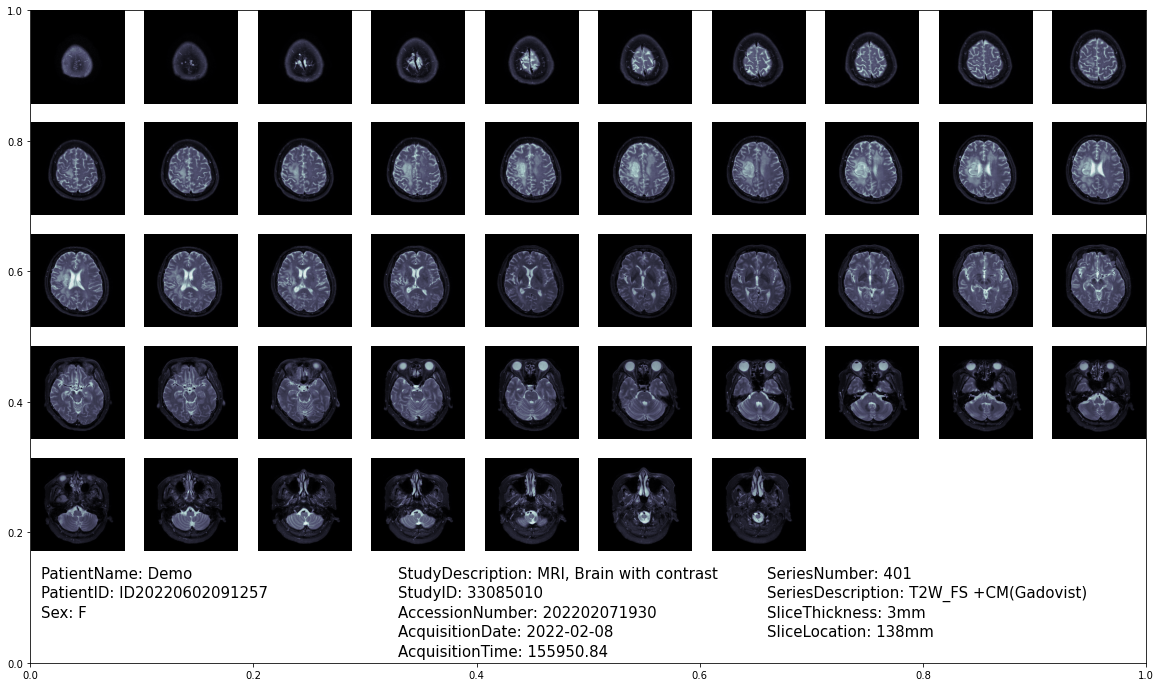

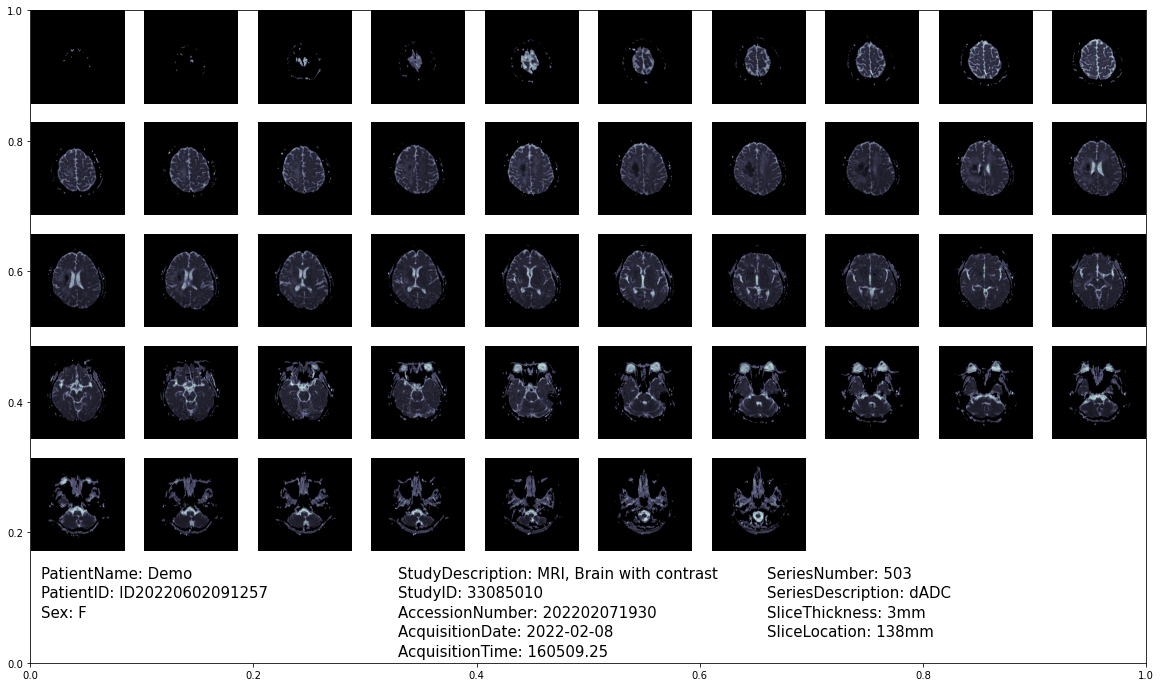

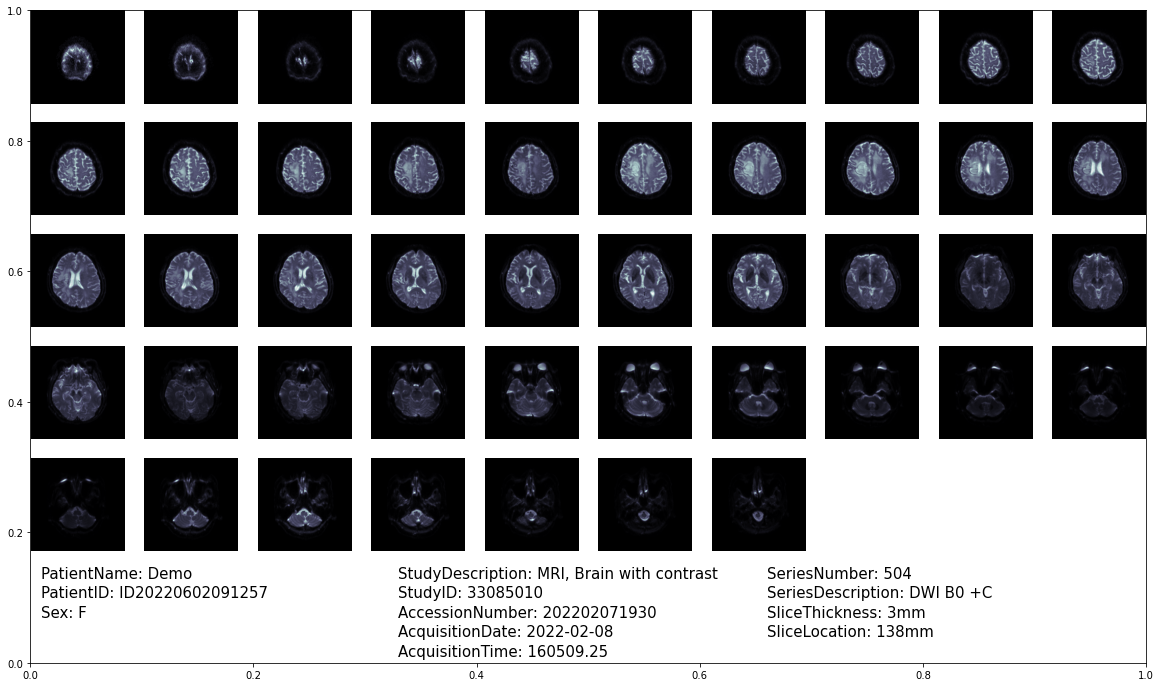

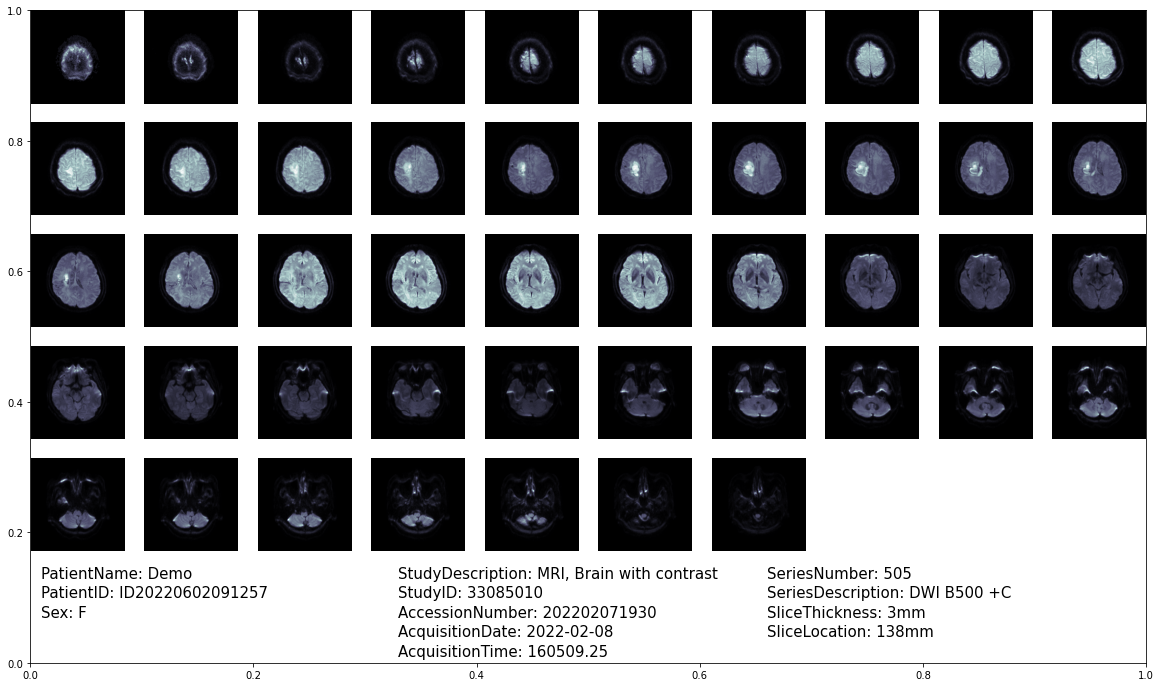

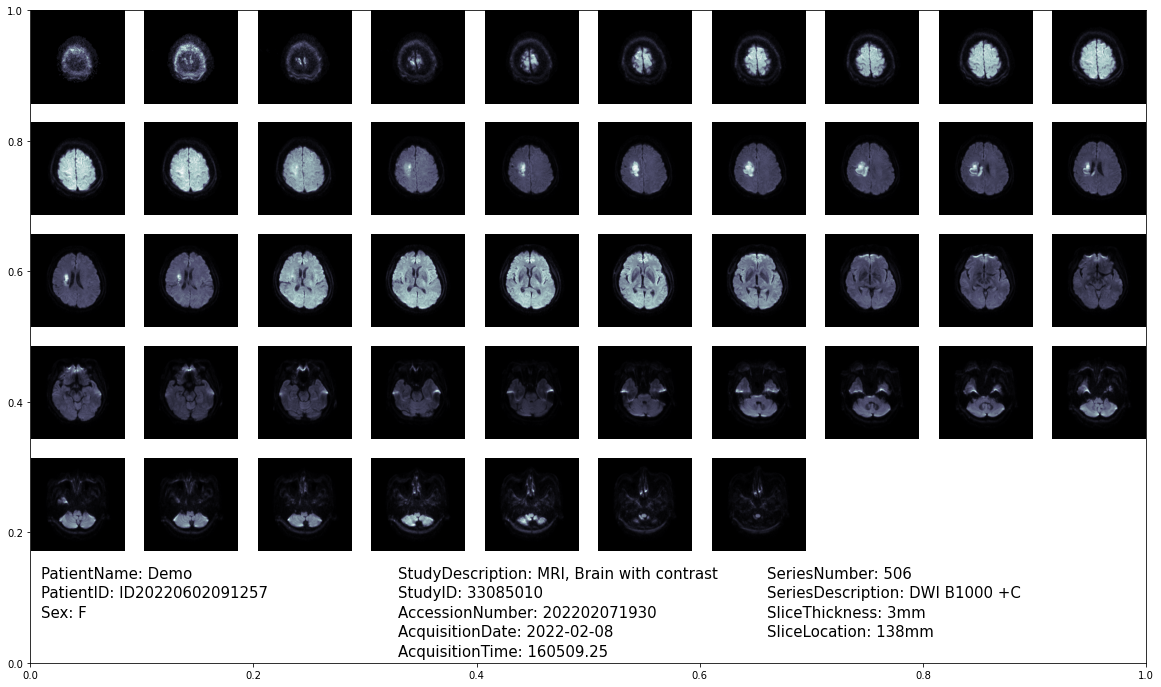

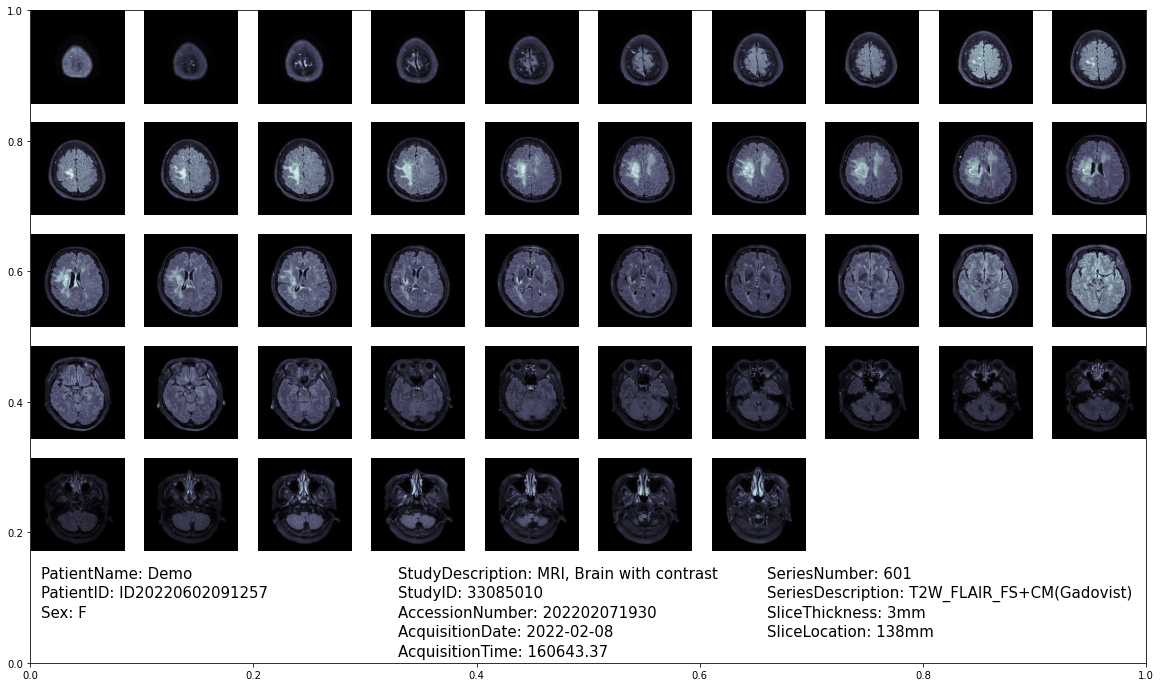

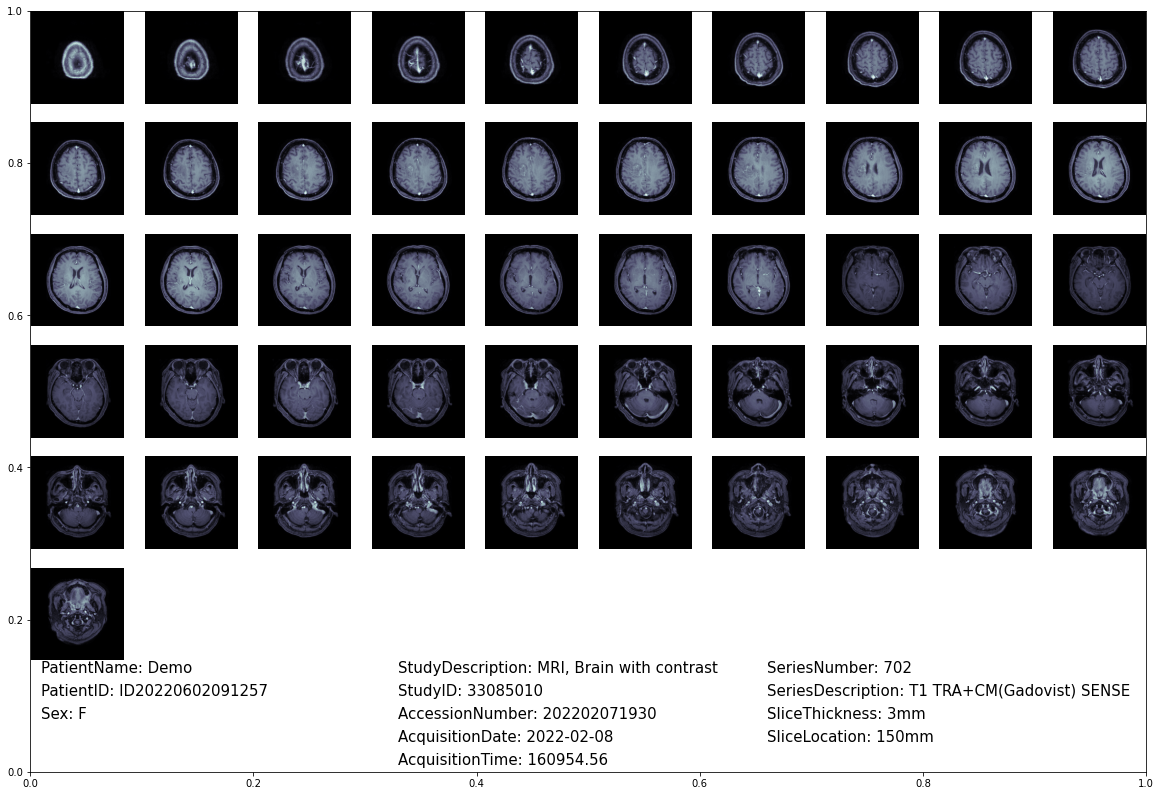

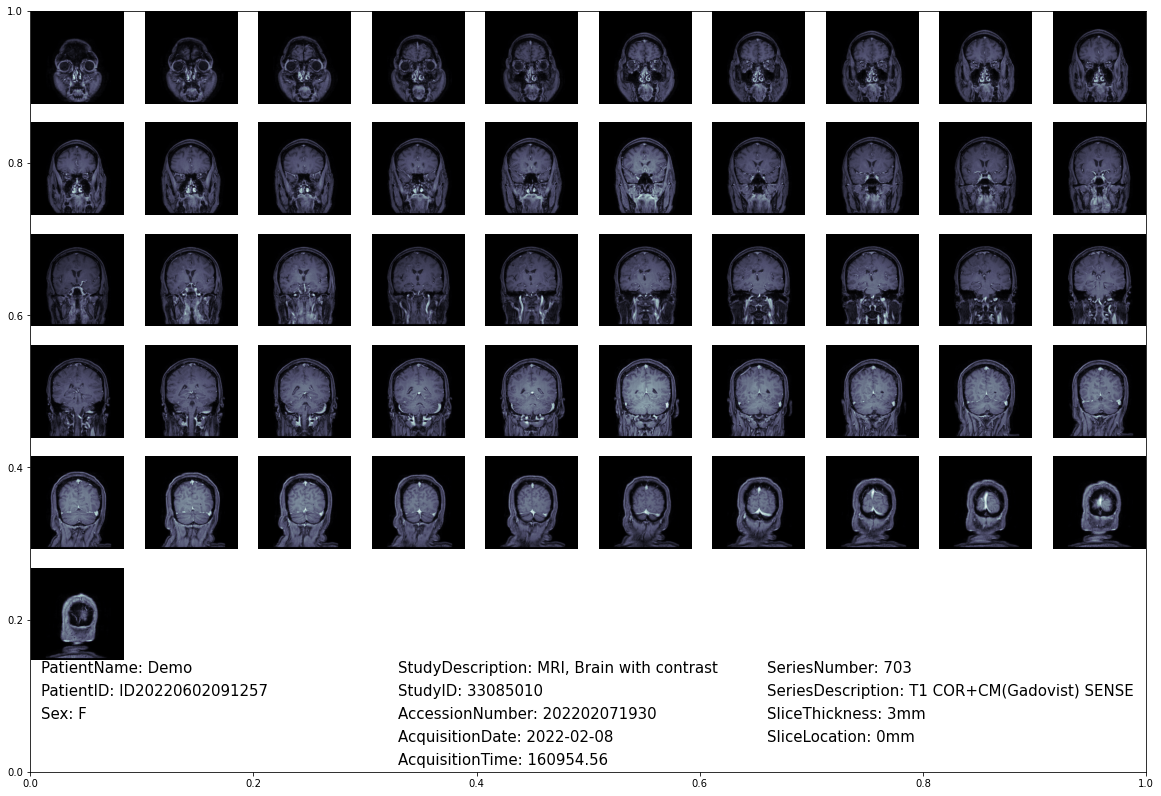

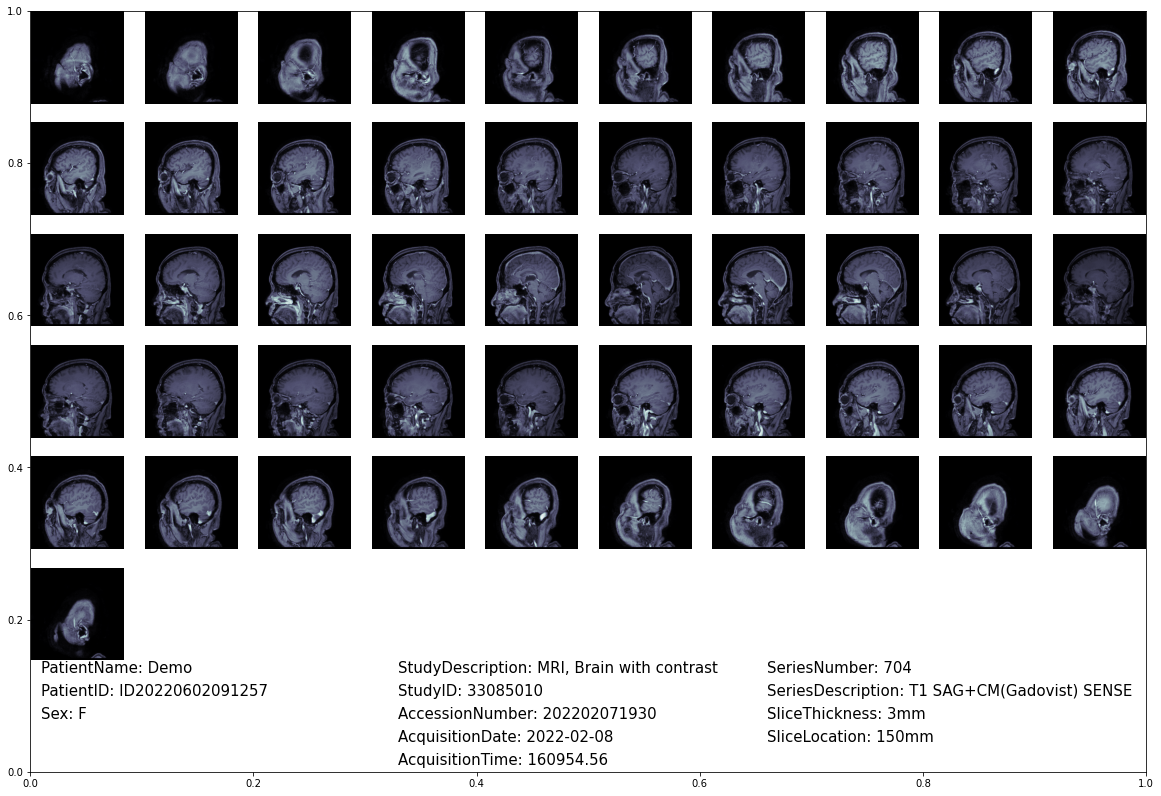

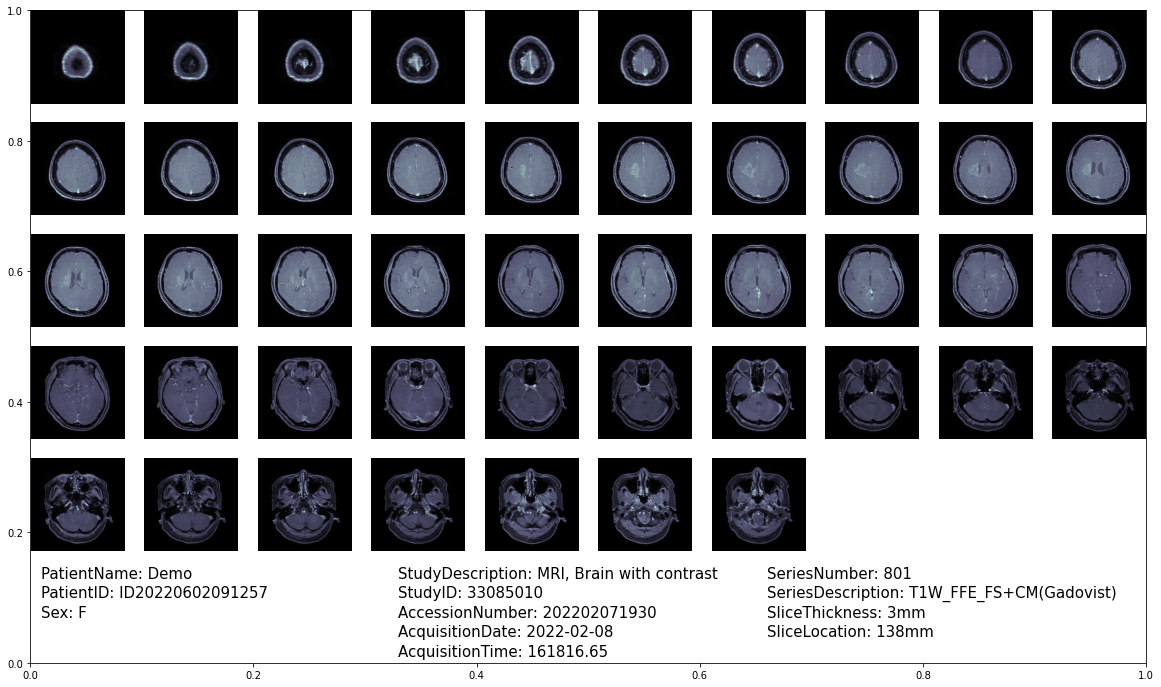

In [4]:
#draw images
from datetime import datetime
for i in seriesDict:
    fileList = seriesDict[i]
    quantity = len(fileList)
    cols = 10
    rows = math.ceil(quantity/cols) + 1 # add one row to place text
    fig = plt.figure(figsize=(cols*2,rows*2))
    flag = True
    for j in range(quantity):
        ds = dcmread('002/' + fileList[j])
        
        if ("PixelData" in ds):
            #add text only once
            if flag:
                fontsize = 15
                plt.text(0.01,0.13,"PatientName: " + str(ds.PatientName), fontsize=fontsize)
                plt.text(0.01,0.1,"PatientID: " + str(ds.PatientID), fontsize=fontsize)
                plt.text(0.01,0.07,"Sex: " + str(ds.PatientSex), fontsize=fontsize)
                plt.text(0.33,0.13,"StudyDescription: " + ds.StudyDescription, fontsize=fontsize)
                plt.text(0.33,0.1,"StudyID: " + ds.StudyID, fontsize=fontsize)
                plt.text(0.33,0.07,"AccessionNumber: " + ds.AccessionNumber, fontsize=fontsize)
                plt.text(0.33,0.04,"AcquisitionDate: " + str(datetime.strptime(ds.AcquisitionDate, '%Y%m%d').date()), fontsize=fontsize)
                plt.text(0.33,0.01,"AcquisitionTime: " + ds.AcquisitionTime, fontsize=fontsize)
                plt.text(0.66,0.13,"SeriesNumber: " + str(ds.SeriesNumber), fontsize=fontsize)
                plt.text(0.66,0.1,"SeriesDescription: " + str(ds.SeriesDescription), fontsize=fontsize)
                plt.text(0.66,0.07,"SliceThickness: " + str(math.ceil(ds.SliceThickness)) + "mm", fontsize=fontsize)
                plt.text(0.66,0.04,"SliceLocation: " + str(math.ceil(ds.SliceLocation)) + "mm", fontsize=fontsize)
                flag = False   
                
            fig.add_subplot(rows, cols, j+1)
            plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
            plt.axis('off')  

In [50]:
files = glob.glob("001/*.dcm")
ds = dcmread(files[0])
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 164
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: 1.2.840.113820.5.1.4.0.1.1
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.2.18.42623.2021082509003398749212278
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113820.80
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']
(0008, 0012) Instance Creation Date              DA: '20210825'
(0008, 0013) Instance Creation Time              TM: '090034.966000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018

In [49]:
for file in files:
    ds = dcmread(file)
    patientID = ds.PatientID
    studyID = ds.StudyID
    seriesNumber = ds.SeriesNumber